In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
all_data = pd.read_csv("data/train.csv")

In [3]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
all_data["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [6]:
all_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


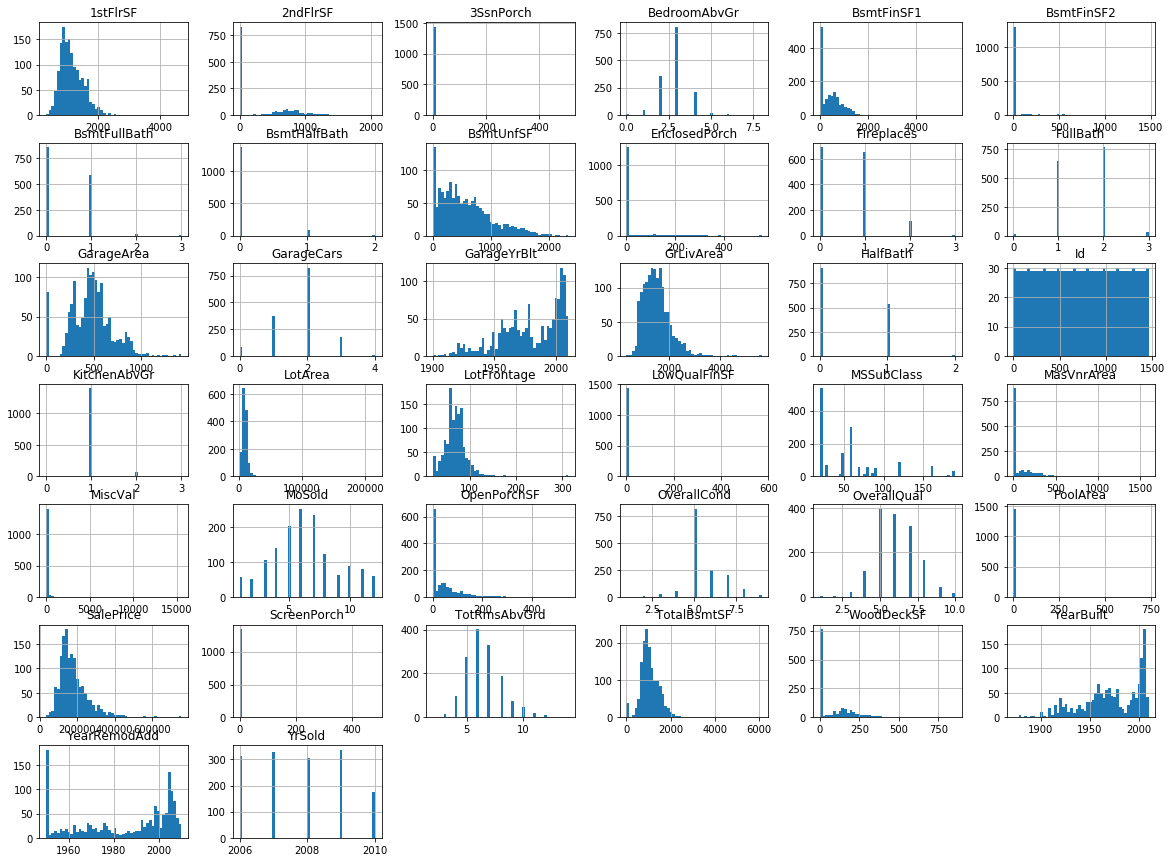

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
all_data.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
from zlib import crc32

In [10]:
def test_set_check(identifier, test_ratio):
    return(crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32)

In [12]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
train_set, test_set = train_test_split(all_data, test_size=0.2, random_state=75)

In [18]:
housing = train_set.copy()

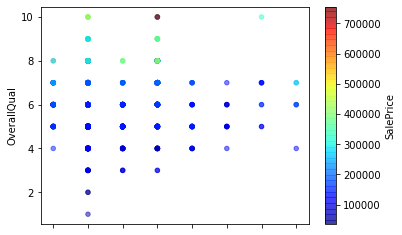

In [23]:
housing.plot(kind="scatter", x="HouseStyle", y="OverallQual", alpha=0.5,
            c="SalePrice", cmap=plt.get_cmap("jet"), colorbar=True,)


In [24]:
corr_matrix = housing.corr()

In [29]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.787186
GrLivArea        0.722991
TotalBsmtSF      0.647887
GarageCars       0.636055
1stFlrSF         0.631242
GarageArea       0.624630
FullBath         0.575500
TotRmsAbvGrd     0.546057
YearBuilt        0.522826
YearRemodAdd     0.504841
MasVnrArea       0.487211
GarageYrBlt      0.479083
Fireplaces       0.477565
BsmtFinSF1       0.427680
LotFrontage      0.352328
2ndFlrSF         0.326539
WoodDeckSF       0.314551
OpenPorchSF      0.292505
HalfBath         0.283683
LotArea          0.278474
BsmtFullBath     0.236744
BsmtUnfSF        0.192589
BedroomAbvGr     0.181227
PoolArea         0.106072
ScreenPorch      0.099050
3SsnPorch        0.051938
MoSold           0.018604
BsmtHalfBath    -0.001996
BsmtFinSF2      -0.003858
Id              -0.008177
MiscVal         -0.020613
YrSold          -0.027148
LowQualFinSF    -0.051942
MSSubClass      -0.078509
OverallCond     -0.101459
EnclosedPorch   -0.113672
KitchenAbvGr    -0.138419
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002026FBBC188>,
      dtype=object)

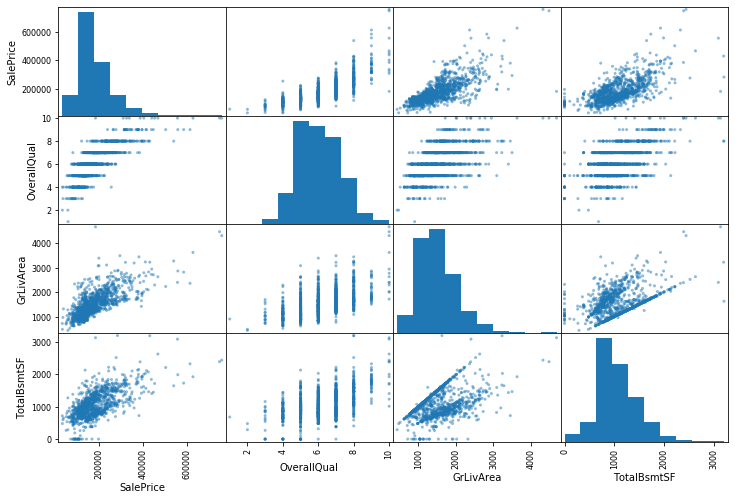

In [30]:
attributes = ["SalePrice", "OverallQual", "GrLivArea", "TotalBsmtSF"]
scatter_matrix(housing[attributes], figsize=(12,8))

In [38]:
housing_labels = housing["SalePrice"].copy()

In [39]:
housing_labels.shape

(1168,)

In [44]:
imputer = SimpleImputer(strategy="median")

In [93]:
features=["LotArea", "Neighborhood", "HouseStyle"]


In [94]:
housing_sel = housing[features]
housing_sel = pd.get_dummies(housing_sel)

In [95]:
num_pipeline = Pipeline([
                          ('imputer', SimpleImputer(strategy="median")),
                        ('std_scaler', StandardScaler()),
                        ])

In [103]:
sc = StandardScaler()
housing_tr = sc.fit_transform(housing_sel)

In [104]:
housing_tr.shape

(1168, 33)

In [105]:
lin_reg = LinearRegression()

In [106]:
lin_reg.fit(housing_tr, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
some_data = housing_sel.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = sc.transform(some_data)
some_data_prepared.shape
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [228487.92683089 113615.75345304 130527.75345304 181503.75345304
 177055.75345304]
Labels: [175000, 98000, 128500, 136500, 143000]


In [109]:
housing_predictions = lin_reg.predict(housing_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

51250.832143934414

In [111]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_tr, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [112]:
housing_predictions = tree_reg.predict(housing_tr)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

6457.713672513046

In [114]:
scores = cross_val_score(tree_reg, housing_tr, housing_labels,
                        scoring="neg_mean_squared_error",
                        cv=10)

In [115]:
tree_rmse_scores = np.sqrt(-scores)

In [116]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    

In [117]:
display_scores(tree_rmse_scores)

Scores: [97323.9188068  59775.89644695 47524.60097481 60889.13430597
 54639.43367976 61854.72571821 62868.36361976 56914.79534335
 79069.41770439 77152.23097249]
Mean: 65801.25175724803
Standard deviation: 13859.1827102143


In [119]:
lin_scores = cross_val_score(lin_reg, housing_tr, housing_labels,
                            scoring="neg_mean_squared_error",
                            cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [72026.27688309 47835.9856652  39117.71898103 49468.97053981
 53394.48541787 48948.4949902  47946.15570369 49220.42140361
 70155.65989669 45666.87171265]
Mean: 52378.104119384065
Standard deviation: 9972.32626649191


In [123]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_tr, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_tr, housing_labels,
                               scoring="neg_mean_squared_error",
                               cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [77727.15296055 47581.79569953 38638.87946997 47956.54632211
 45591.99482785 51067.61167092 48709.55792566 47242.80946542
 65953.4961693  57147.37522881]
Mean: 52761.72197401287
Standard deviation: 10803.050776075144
